This notebook is to demonstrate fundamentals of big data with pyspark


In [5]:
!pip install pyspark

In [6]:
import os




Mounted at /content/drive


In [7]:
# List files in a directory within Google Drive
path = '/content/drive/My Drive/Big Data Fundamentals with PySpark'
os.chdir(path)
print(os.listdir())

['Complete_Shakespeare.txt', 'ratings.csv', '5000_points.txt', 'Fifa2018_dataset.csv', 'people.csv', 'spam.txt', 'ham.txt', 'TempFile', 'TempFile2']


In [8]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np




Big data falls under the 3 v's
Velocity - speed of data
Variety - types of data
Volume - size of data


Ways of working with big data:
Clustered computing - pooled resources
Parallel computing - simultaneous on one computer
Batch processing - breaking job into batches
Distributed computing - collection of nodes running in parallel
Real time processing immediate processing of data

Processing systems
Hadoop / MapReduce: scalable and fault tolerant system written in Java
Open source good for batch processing


Apache spark: general purpose and lightning fast cluster computing system
Open source and good for batch and real time processing the newest preference

Distributed cluster computing
Efficient in-memory computation for large data
Fast processing framework
Has support for Python R and SQL

Has spark core with libraries built on top like
Spark SQL - processing structures and semi structured data
MLlib - common Ml algorithms
GraphX - tools for manipulating graphs and performing parallel computations
Spark Streaming - scalable high throughput library for real-time data

To use spark you need an entry point
An entry point is where control is transferred from the operating system to the provided program

You do this by calling SparkComtext
sc.version shows the version

In [9]:
spark = SparkSession.builder.getOrCreate()

# Access SparkContext from SparkSession
sc = spark.sparkContext

sc.pythonVer

'3.10'

In [10]:
# spark has many built i functinos here are some exmaples:

#Map example
items = [1,2,3]
list(map(lambda x: x+2, items))


[3, 4, 5]

In [11]:
items = [1,2,3]
f = filter(lambda x: x%2 !=0, items)
print(list(f))

[1, 3]


RDD's
Resilient distributed dataset a collection of data distributed accross the cluster backbone of pyspark

When processing writes into partitions and splits accross nodes

Resilient can with stand failiure
Distributed  data accross datasets
Collection of partitioned data accross datasets



In [12]:
# 3 ways to create
# Parallelise
# Load data from external data sets
# From existing RDD

rdd = sc.parallelize([1,2,3,4,5])

# Create an RDD from a list of words
RDD = sc.parallelize(["Spark", "is", "a", "framework", "for", "Big Data processing"])

# Print out the type of the created object
print("The type of RDD is", type(RDD))

# Print out the type of the created object
print("The type of RDD is", type(rdd))

The type of RDD is <class 'pyspark.rdd.RDD'>
The type of RDD is <class 'pyspark.rdd.RDD'>


In [13]:
file_path = 'Complete_Shakespeare.txt'
# Create a fileRDD from file_path
fileRDD = sc.textFile(file_path)

# Check the type of fileRDD
print("The file type of fileRDD is", type(fileRDD))

The file type of fileRDD is <class 'pyspark.rdd.RDD'>


In [14]:
# Check the number of partitions in fileRDD
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())

Number of partitions in fileRDD is 2


Add spark operations support transforming and action: lazy evaluation is when actions are only actioned when needed

In [15]:
# you can also specify partitions
fileRDD = sc.textFile(file_path, minPartitions=4)

In [16]:
# you can also specify partitions
rdd = sc.parallelize([1,2,3,4,5], numSlices=4)

In [17]:
# Map = takes function and applies to every element

RDD = sc.parallelize([1,2,3,4])
RDD_map = RDD.map(lambda x: x*x)
output = RDD_map.collect()
print(output)


[1, 4, 9, 16]


In [18]:
RDD = sc.parallelize([1,2,3,4])
RDD_filter = RDD.filter(lambda x: x>2)
output = RDD_filter.collect()
print(output)

[3, 4]


In [19]:
# Flat map returns multiple values per element so 2 strings can be split into multiple
RDD = sc.parallelize(["Hello World", "how are you"])
RDD_flatmap = RDD.flatMap(lambda x: x.split(" "))
output = RDD_flatmap.collect()
print(output)

['Hello', 'World', 'how', 'are', 'you']


In [20]:
# You can use union to join two RDDs

RDD = sc.parallelize([1,2,3,4])
a = RDD.filter(lambda x: x>2)
b = RDD.filter(lambda x: x<2)
c = a.union(b)

Rdd actions are operations that perform a calculation and return values
collect() - returns all elements as an array
Take(N) - returns an array with first N elements
first() - prints the first element of the RDD
count()

In [21]:
RDD_map.collect()
RDD_map.take(2)
RDD_map.first()
RDD_map.count()

4

Pair RDD is a special kind of dataset to work with key value pairs

In [22]:
# Pair RDD is a special kind of dataset to work with key value pairs
my_tuple = [("Adam",21),("Steve",24),("Becca",22)]
RDD_pair_tuple = sc.parallelize(my_tuple)
print(RDD_pair_tuple.collect())

[('Adam', 21), ('Steve', 24), ('Becca', 22)]


In [23]:
my_list = ["Adam 21", "Steve 24", "Becca 22"]
regular_rdd  = sc.parallelize(my_list)
RDD_pair_list = regular_rdd.map(lambda s: (s.split(' ')[0], s.split(' ')[1]))
print(RDD_pair_list.collect())

[('Adam', '21'), ('Steve', '24'), ('Becca', '22')]


PairRDDs work with regular transformations with a slight change


In [24]:
# reduceByKey(function) - Combine values with the same key

my_tuple = ([("Adam",21),("Steve",24),("Becca",22),("Becca",22)])
RDD_pair = sc.parallelize(my_tuple)
pair_rdd_reducebykey = RDD_pair.reduceByKey(lambda x,y: x+y)
pair_rdd_reducebykey.collect()

[('Becca', 44), ('Adam', 21), ('Steve', 24)]

In [25]:
# invert pairs
pair_rdd_reducebykey_rev = pair_rdd_reducebykey.map(lambda x: (x[1], x[0]))

In [26]:
# sort by key
pair_rdd_reducebykey_rev.sortByKey(ascending=False).collect()

[(44, 'Becca'), (24, 'Steve'), (21, 'Adam')]

In [27]:
# groupByKey() - groups values with the same key


airports = [("US","JFK"),("US","SFO"),("US","LAA"),("UK","LGW"),("UK","LHR"),("FR","CDG")]
airports = sc.parallelize(airports)
pairRDD_group = airports.groupByKey().collect()

In [28]:
for cont, air in pairRDD_group:
	print(cont, list(air))

US ['JFK', 'SFO', 'LAA']
UK ['LGW', 'LHR']
FR ['CDG']


In [29]:
RDD1 = sc.parallelize([("Messi",34),("Ronaldo",32),("Neymar",21)])
RDD2 = sc.parallelize([("Messi",80),("Ronaldo",110),("Neymar",100)])
Joined = RDD1.join(RDD2).collect()

In [30]:
# Create PairRDD Rdd with key value pairs
Rdd = sc.parallelize([(1,2), (3,4), (3,6), (4,5)])
# Apply reduceByKey() operation on Rdd
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: x + y)

In [31]:
for num in Rdd_Reduced.collect():
  print("Key {} has {} Counts".format(num[0], num[1]))


Key 4 has 5 Counts
Key 1 has 2 Counts
Key 3 has 10 Counts


In [32]:
# Sort the reduced RDD with the key by descending order
Rdd_Reduced_Sort = Rdd_Reduced.sortByKey(ascending=True)

# Iterate over the result and retrieve all the elements of the RDD
for num in Rdd_Reduced_Sort.collect():
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 1 has 2 Counts
Key 3 has 10 Counts
Key 4 has 5 Counts


In [33]:
# Reduce function can be used to aggregate
x= [1,2,3,4]
Rdd = sc.parallelize(x)
Reduced = Rdd.reduce(lambda x,y: x+y)
print(Reduced)

10


In [35]:
# Save as text file can output an rdd to a text file
# RDD.saveAsTextFile("TempFile")
# partitioned data

In [36]:
# RDD.coalesce(1).saveAsTextFile("TempFile2")
# reduce to one partition and save


In [37]:
# countByKey() - only works with RDDs that contain (key, value) pairs
rdd = sc.parallelize([("a", 1), ("a", 1), ("b", 1)])

# Use countByKey() to count occurrences of each key
for key, val in rdd.countByKey().items():
    print(key, val)


a 2
b 1


In [38]:
sc.parallelize([(1,2),(3,4)]).collectAsMap()

{1: 2, 3: 4}

In [39]:
# Count the unique keys
total = rdd.countByKey()
for key, val in total.items():
    print(key, val)

a 2
b 1


In [40]:
os.listdir()

['Complete_Shakespeare.txt',
 'ratings.csv',
 '5000_points.txt',
 'Fifa2018_dataset.csv',
 'people.csv',
 'spam.txt',
 'ham.txt',
 'TempFile',
 'TempFile2']

In [41]:
file_path = 'spam.txt'
baseRDD = sc.textFile(file_path)
# Split the lines of baseRDD into words
splitRDD = baseRDD.flatMap(lambda x: x.split())

In [42]:
# Count the total number of words
print("Total number of words in splitRDD:", splitRDD.count())

Total number of words in splitRDD: 17862


In [43]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now']

In [44]:
# Convert the words in lower case and remove stop words from the stop_words curated list
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)

In [45]:
# Create a tuple of the word and 1
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))

In [46]:
# Count of the number of occurences of each word
resultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)

In [47]:
# Display the first 10 words and their frequencies from the input RDD
for word in resultRDD.take(10):
    print(word)

('1', 30)
('new', 42)
('Please', 34)
('call', 185)
('Urgent!', 11)
('landline.', 17)
('Tenerife', 7)
('Holiday', 21)
('cash', 42)
('await', 19)


In [48]:
# Swap the keys and values from the input RDD
resultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))

In [49]:
# Sort the keys in descending order
resultRDD_swap_sort = resultRDD_swap.sortByKey(ascending=False)

In [50]:
# Show the top 10 most frequent words and their frequencies from the sorted RDD
for word in resultRDD_swap_sort.take(10):
    print("{},{}". format(word[1], word[0]))

call,185
2,169
Call,136
ur,107
&,98
4,93
FREE,89
mobile,81
claim,73
U,70


RDD's

In [51]:
names= ['Model','Year','Height','Width','Weight']

In [52]:
iphones_RDD = sc.parallelize([("XS",2018,5.65,2.79,6.24),("XR",2018,5.94,2.98,6.84),("X1",2017,5.65,2.79,6.13)])

In [53]:
# read in from different file formats
df_csv = spark.read.csv("people.csv",header=True, inferSchema=True)

In [54]:
# df_json = spark.read.json("people.json")

In [55]:
# names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])

In [56]:
# Create an DataFrame from file_path
people_df = spark.read.csv("people.csv", header=True, inferSchema=True)


In [57]:
# print schema does columns
people_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: timestamp (nullable = true)



In [58]:
people_df.withColumnRenamed('date of birth','DOB')

DataFrame[_c0: int, person_id: int, name: string, sex: string, DOB: timestamp]

In [59]:
# orderby
people_df.orderBy('person_id')

DataFrame[_c0: int, person_id: int, name: string, sex: string, date of birth: timestamp]

In [60]:
people_df.show(10)

+---+---------+----------------+------+-------------------+
|_c0|person_id|            name|   sex|      date of birth|
+---+---------+----------------+------+-------------------+
|  0|      100|  Penelope Lewis|female|1990-08-31 00:00:00|
|  1|      101|   David Anthony|  male|1971-10-14 00:00:00|
|  2|      102|       Ida Shipp|female|1962-05-24 00:00:00|
|  3|      103|    Joanna Moore|female|2017-03-10 00:00:00|
|  4|      104|  Lisandra Ortiz|female|2020-08-05 00:00:00|
|  5|      105|   David Simmons|  male|1999-12-30 00:00:00|
|  6|      106|   Edward Hudson|  male|1983-05-09 00:00:00|
|  7|      107|    Albert Jones|  male|1990-09-13 00:00:00|
|  8|      108|Leonard Cavender|  male|1958-08-08 00:00:00|
|  9|      109|  Everett Vadala|  male|2005-05-24 00:00:00|
+---+---------+----------------+------+-------------------+
only showing top 10 rows



In [61]:
# Count the number of rows
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))

There are 100000 rows in the people_df DataFrame.


In [62]:
# Count the number of columns and print their names
print("There are {} columns in the people_df DataFrame and their names are {}".format(len(people_df.columns), people_df.columns))


There are 5 columns in the people_df DataFrame and their names are ['_c0', 'person_id', 'name', 'sex', 'date of birth']


In [63]:
people_df.dropDuplicates().count()

100000

In [64]:
# Select name, sex and date of birth columns
people_df_sub = people_df.select('name', 'sex', 'date of birth')

# Print the first 10 observations from people_df_sub
people_df_sub.show(10)


+----------------+------+-------------------+
|            name|   sex|      date of birth|
+----------------+------+-------------------+
|  Penelope Lewis|female|1990-08-31 00:00:00|
|   David Anthony|  male|1971-10-14 00:00:00|
|       Ida Shipp|female|1962-05-24 00:00:00|
|    Joanna Moore|female|2017-03-10 00:00:00|
|  Lisandra Ortiz|female|2020-08-05 00:00:00|
|   David Simmons|  male|1999-12-30 00:00:00|
|   Edward Hudson|  male|1983-05-09 00:00:00|
|    Albert Jones|  male|1990-09-13 00:00:00|
|Leonard Cavender|  male|1958-08-08 00:00:00|
|  Everett Vadala|  male|2005-05-24 00:00:00|
+----------------+------+-------------------+
only showing top 10 rows



In [65]:
# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()

In [66]:
# Count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates".format(people_df_sub.count(), people_df_sub_nodup.count()))

There were 100000 rows before removing duplicates, and 99998 rows after removing duplicates


In [67]:
# Filter people_df to select females
people_df_female = people_df.filter(people_df.sex == "female")

# Filter people_df to select males
people_df_male = people_df.filter(people_df.sex == "male")

In [68]:
# Count the number of rows
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame".format(people_df_female.count(), people_df_male.count()))

There are 49014 rows in the people_df_female DataFrame and 49066 rows in the people_df_male DataFrame


You can use SQL query instead of DataFrame API

SQL queries can be more concise and easier to understand


To use sql on data frame must create temp with createOrReplaceTempView(“table”)

In [69]:
# Create a temporary table "people"
people_df.createOrReplaceTempView("people")

In [70]:
# Construct a query to select the names of the people from the temporary table "people"
query = '''SELECT name FROM people'''

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



In [71]:
# Filter the people table to select female sex
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')

# Filter the people table DataFrame to select male sex
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')

# Count the number of rows in both people_df_female and people_male_df DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames".format(people_female_df.count(), people_male_df.count()))

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrames


Plotting is done with toPandas(), pyspark_dist_explore and HAndySpark

pyspark_dist_explore  - plotting for quick insights into DataFrames using hist(), distplot(), pandas_histogram()

hist(column,bins=n, color=c)

This makes it a pandas DF

Pandas DF are in memory so single server limited memory, pyspark run in parallel
Pandas mutable PySpark immutable


In [72]:
names_df = people_df_names.toPandas()
# Handy spark, easy data and distributed computation retained good for EDA


# Hdf = df.toHandy()

# hdf.cols[column].history()

In [73]:
# Check the column names of names_df
print("The column names of names_df are", names_df.columns)

The column names of names_df are Index(['name'], dtype='object')


In [74]:
# Load the Dataframe
fifa_df = spark.read.csv('Fifa2018_dataset.csv', header=True, inferSchema=True)


# Show the first 10 observations
fifa_df.show(10)

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [75]:
# Check the schema of columns
fifa_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [76]:
# Print the total number of rows
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))


There are 17981 rows in the fifa_df DataFrame


In [77]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_df_table')

In [78]:
# Construct the "query"
query = '''SELECT Age FROM fifa_df_table WHERE Nationality == "Germany"'''
# Apply the SQL "query"
fifa_df_germany_age = spark.sql(query)
# Generate basic statistics
fifa_df_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293757|
|    min|               16|
|    max|               36|
+-------+-----------------+



In [79]:
# Convert fifa_df to fifa_df_germany_age_pandas DataFrame
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()

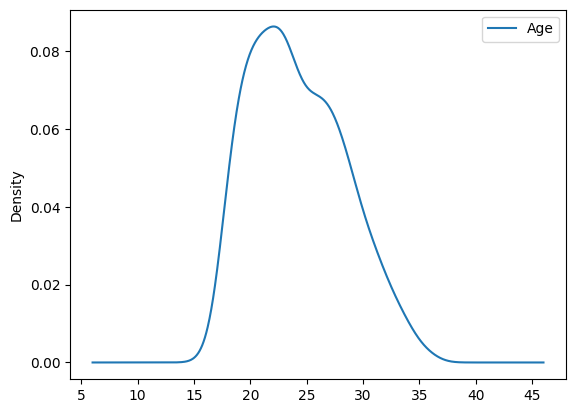

In [80]:
import matplotlib.pyplot as plt
# Plot the 'Age' density of Germany Players
fifa_df_germany_age_pandas.plot(kind='density')
plt.show()

Mllib is a component of spark for ML

Ml algorithms
Fraternisation (feature extraction, transformation, dimensionality reduction and selection)

Pipelines for contracting and evaluation ML pipelines

Alorithms on offer include:

PySpark MLlib Algorithms
* Classification (Binary and Multiclass) and Regression: Linear SVMs, logistic regression, decision trees, random forests, gradient-boosted trees, naive Bayes, linear least squares, Lasso, ridge regression, isotonic regression
* Collaborative filtering: Alternating least squares (ALS)
* Clustering: K-means, Gaussian mixture, Bisecting K-means, and Streaming K-Means

example:


In [81]:
# different model types fall under different libraries
from pyspark.mllib.recommendation import ALS

from pyspark.mllib.classification import LogisticRegressionWithLBFGS

from pyspark.mllib.clustering import KMeans


Collaborative filtering finds users with a common interest

Commonly used for recommender systems you have different approaches

User-USer filtering - finds users that are similar to the target user

Item Item filtering - find and recommends items that are similar to items with the target user


In [82]:
from pyspark.mllib.recommendation import Rating
r = Rating(user=1,product=2, rating=5.0)
(r[0],r[1],r[2])

(1, 2, 5.0)

In [86]:
ratings = spark.read.csv('ratings.csv')
ratings = ratings.rdd

In [87]:
# Transform the ratings RDD
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))

In [88]:
# Split the data into training and test
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])

In [89]:
# Create the ALS model on the training data
model = ALS.train(training_data, rank=10, iterations=10)
# Drop the ratings column
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))

In [91]:
# Predict the model
predictions = model.predictAll(testdata_no_rating)

In [92]:
# Return the first 2 rows of the RDD
predictions.take(2)

[Rating(user=30, product=1084, rating=4.426342413485022),
 Rating(user=336, product=1084, rating=3.3023221879923526)]

In [93]:
# Prepare ratings data
rates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))

In [94]:
# Prepare predictions data
preds = predictions.map(lambda r: ((r[0], r[1]), r[2]))

In [95]:
# Join the ratings data with predictions data
rates_and_preds = rates.join(preds)

In [96]:
# Calculate and print MSE
MSE = rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error of the model for the test data = {:.2f}".format(MSE))

Mean Squared Error of the model for the test data = 1.35


Pyspark MLlib contains specific data types Vectors and LabelledPoint

Vectors can be Dense and Sparse
Dense vectors store all their entries in an array of floating point numbers

Sparse store only the nonzero values and their indicies


In [98]:
from pyspark.ml.linalg import Vectors

Densevec = Vectors.dense([1.0,2.0,3.0])

sparseVec = Vectors.sparse(4, {1: 1.0, 3:5.5})

LabeledPoint is a wrapper for input features and predicted value

In [100]:
from pyspark.mllib.regression import LabeledPoint
positive = LabeledPoint(1.0, [1.0,0.0,3.0])
negative = LabeledPoint(0.0, [2.0,1.0,1.0])
print(positive)
print(negative)

(1.0,[1.0,0.0,3.0])
(0.0,[2.0,1.0,1.0])


HashingTF is a feature transformation technique used in machine learning and natural language processing (NLP) to convert text data (or any categorical data) into numerical feature vectors. It is a part of the TF-IDF (Term Frequency-Inverse Document Frequency) transformation pipeline, and is commonly used for preparing text data for algorithms that require numerical input, such as logistic regression, decision trees, and other machine learning models.

In [101]:
from pyspark.mllib.feature import HashingTF

sentence = "hello hello world"
words = sentence.split()
tf = HashingTF(10000)
tf.transform(words)

# This will show the hashed version and frequency

SparseVector(10000, {129: 2.0, 3385: 1.0})

The minimum requirement for LogisticRegressionWithLBFGS is an RDD of LabeledPoint


In [102]:
data = [
	LabeledPoint(0.0, [0.0,1.0]),
	LabeledPoint(1.0, [1.0,0.0]),
]
RDD = sc.parallelize(data)

lrm = LogisticRegressionWithLBFGS.train(RDD)

In [104]:
lrm.predict([1.0,0.0])

1

In [105]:
lrm.predict([0.0,1.0])

0

Here's a worked example without manual data

In [107]:
os.listdir()

['Complete_Shakespeare.txt',
 'ratings.csv',
 '5000_points.txt',
 'Fifa2018_dataset.csv',
 'people.csv',
 'spam.txt',
 'ham.txt',
 'TempFile',
 'TempFile2']

In [149]:
# Load the datasets into RDDs
spam_rdd = sc.textFile('spam.txt')
non_spam_rdd = sc.textFile('ham.txt')

In [150]:
# Split the email messages into words
spam_words = spam_rdd.flatMap(lambda email: email.split(' '))
non_spam_words = non_spam_rdd.flatMap(lambda email: email.split(' '))

In [151]:
# Print the first element in the split RDD
print("The first element in spam_words is", spam_words.first())
print("The first element in non_spam_words is", non_spam_words.first())

The first element in spam_words is You
The first element in non_spam_words is Rofl.


In [152]:
# Create a HashingTF instance with 200 features
tf = HashingTF(numFeatures=200)
# Map each word to one feature
spam_features = tf.transform(spam_words)
non_spam_features = tf.transform(non_spam_words)

In [153]:
# Label the features: 1 for spam, 0 for non-spam
spam_samples = spam_features.map(lambda features:LabeledPoint(1, features))
non_spam_samples = non_spam_features.map(lambda features:LabeledPoint(0, features))

In [158]:
# Combine the two datasets using union instead of join
samples = spam_samples.union(non_spam_samples)


In [159]:

# Split the data into training and testing
train_samples,test_samples = samples.randomSplit([0.8, 0.2])


In [156]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

In [160]:

# Train the model
model = LogisticRegressionWithLBFGS.train(train_samples)

# Create a prediction label from the test data
predictions = model.predict(test_samples.map(lambda x: x.features))

# Combine original labels with the predicted labels
labels_and_preds = test_samples.map(lambda x: x.label).zip(predictions)

# Check the accuracy of the model on the test data
accuracy = labels_and_preds.filter(lambda x: x[0] == x[1]).count() / float(test_samples.count())
print("Model accuracy : {:.2f}".format(accuracy))





Model accuracy : 0.81


Cluster Centers: [array([9.50858719, 9.47376207]), array([9.48022135, 1.50489004]), array([1.49796875, 1.5058111 ]), array([1.48644358, 9.50495025])]
Within Set Sum of Squared Error = 11537.632625492693


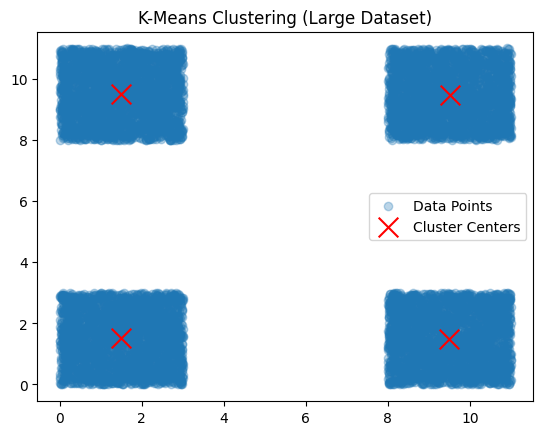

The cluster 2 has Within Set Sum of Squared Error 40895.469298866454
The cluster 3 has Within Set Sum of Squared Error 26349.15393511855
The cluster 4 has Within Set Sum of Squared Error 11537.632625492693
The cluster 5 has Within Set Sum of Squared Error 10878.236186962995
The cluster 6 has Within Set Sum of Squared Error 10254.868833592118
The cluster 7 has Within Set Sum of Squared Error 9549.87114025306
The cluster 8 has Within Set Sum of Squared Error 8909.830914448803
The cluster 9 has Within Set Sum of Squared Error 8471.640757157562


In [139]:
# Required Imports
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.mllib.clustering import KMeans
from pyspark.mllib.linalg import Vectors
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import random


# Step 1: Generate Fake Large Data (10,000 random 2D points)
# Generate random points around two different centers (e.g., (1, 1) and (9, 9))
data = [[random.uniform(0, 3) + random.choice([0, 8]), random.uniform(0, 3) + random.choice([0, 8])] for _ in range(10000)]

# Step 2: Parallelize the data to create an RDD
RDD = sc.parallelize(data)

# Step 3: Train the KMeans model
k = 4  # Number of clusters
model = KMeans.train(RDD, k=k, maxIterations=10)

# Step 4: Get cluster centers
cluster_centers = model.clusterCenters
print(f"Cluster Centers: {cluster_centers}")

# Step 5: Define error function to calculate WSSSE
def error(point):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x ** 2 for x in (point - center)]))

# Step 6: Calculate WSSSE (Within Set Sum of Squared Errors)
WSSSE = RDD.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Step 7: Convert RDD to Spark DataFrame and then to Pandas DataFrame for visualization
df = spark.createDataFrame(RDD.map(lambda x: (float(x[0]), float(x[1]))), schema=["col1", "col2"])
df_pandas = df.toPandas()

# Convert cluster_centers to Pandas DataFrame for visualization
cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])

# Step 8: Visualize the clusters and the cluster centers
plt.scatter(df_pandas["col1"], df_pandas["col2"], label='Data Points', alpha=0.3)
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="x", s=200, label='Cluster Centers')
plt.legend()
plt.title('K-Means Clustering (Large Dataset)')
plt.show()

# Train the model with clusters from 2 to 5 and compute WSSSE for each k
for clst in range(2, 10):
    model = KMeans.train(RDD, clst, seed=1)
    WSSSE = RDD.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print(f"The cluster {clst} has Within Set Sum of Squared Error {WSSSE}")
